# Discusion acerca de la matriz de confusion
* Cuando y por que el "accuracy" puede ser una mala metrica?
* Matriz de confusion multiclase. Metricas sobre cada clase.


Cuando el accuracy no es buena medida?
De mi clase de machine learning

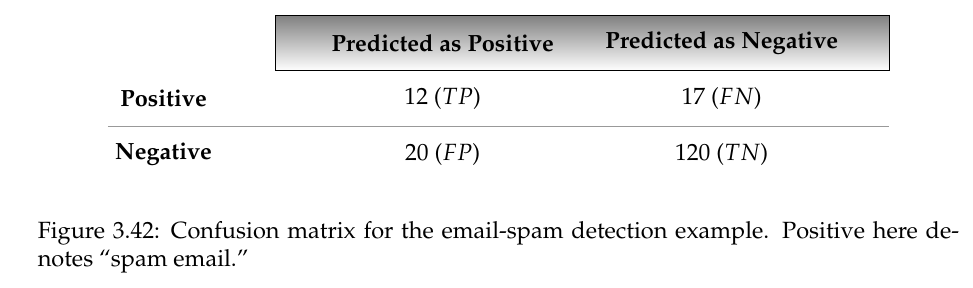

En el ejemplo de "spam email" de la grafica el accuracy es el 78%

Vamos a asumir un algoritmo "dummy" que piensa que todo es "no" spam.

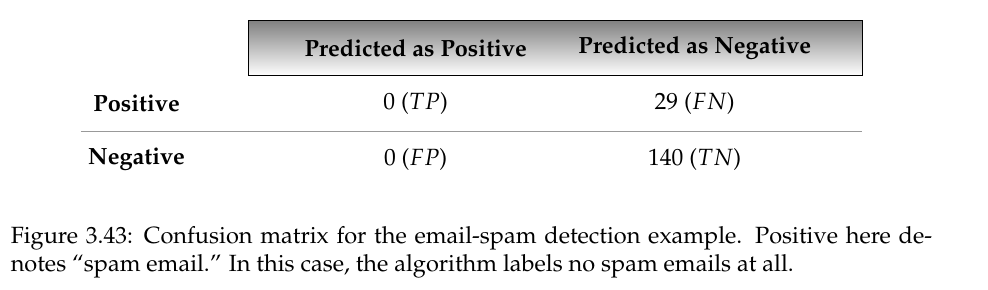

Da 82%. Claro que es ridiculo que un predictor de estos de un accuracy tan alto.

Cuando pasa esto? cuando las clases estan muy desbalanceadoas (imbalance).

Aparecen nuevas medidas:
* Precision
* Recall
* F1 score (es promedio armonico de las dos anteriores)

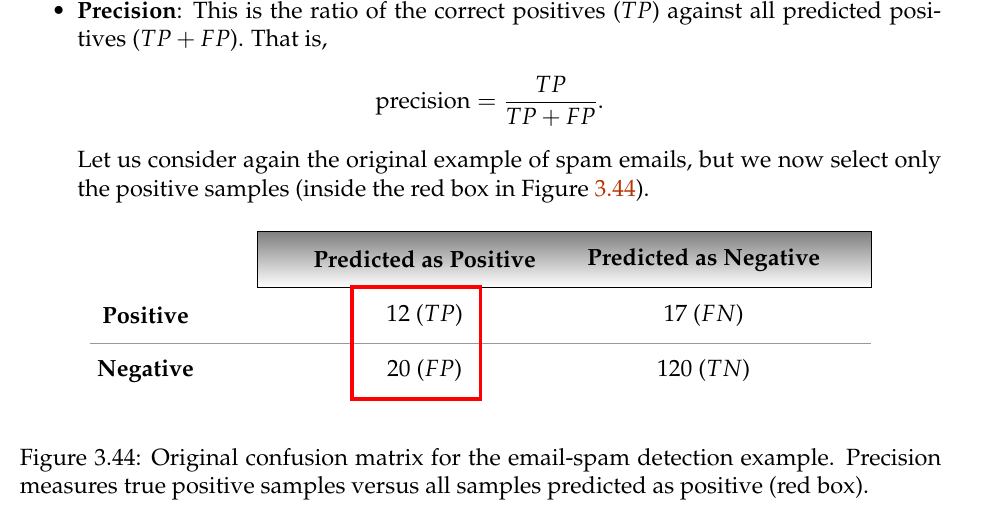

Noten que donde el "accuracy" me dio el 78% este me da el 12%

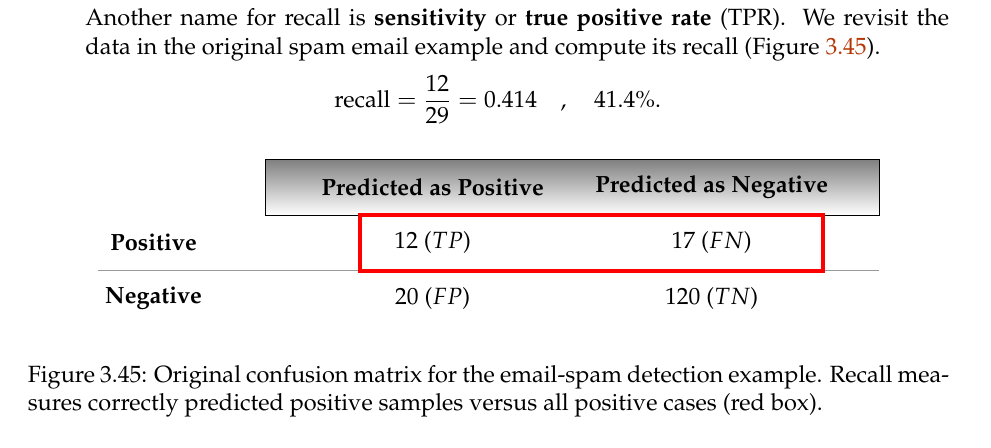

Lo determina lo "malo" de la prediccion son los "F" de "False".
Hay dos "F"
1. FP
2. FN

En una deteccion de cancer es mejor un FP que un FN, por que el paciente puede pedir una segunda opinion y desmentir la primera.
En un fraude bancario es al contrario, email.

precision y recall hacen enfasis en estos dos.

$$ \text{RECALL} = \frac{TP}{TP+FN} $$

Si las dos (precision y recall) son parecidas, no importa cual escoger, pero si son distinas, entonces es mejor una que la otra.

Cuando son muy distintas el F1 que es promedio armonico de los dos es mejor. El promedio armonico es el mas pequenho de los promedios pitagoricos (media aritmetica, la media geometrica, la RMS, y la media armonica (F1).




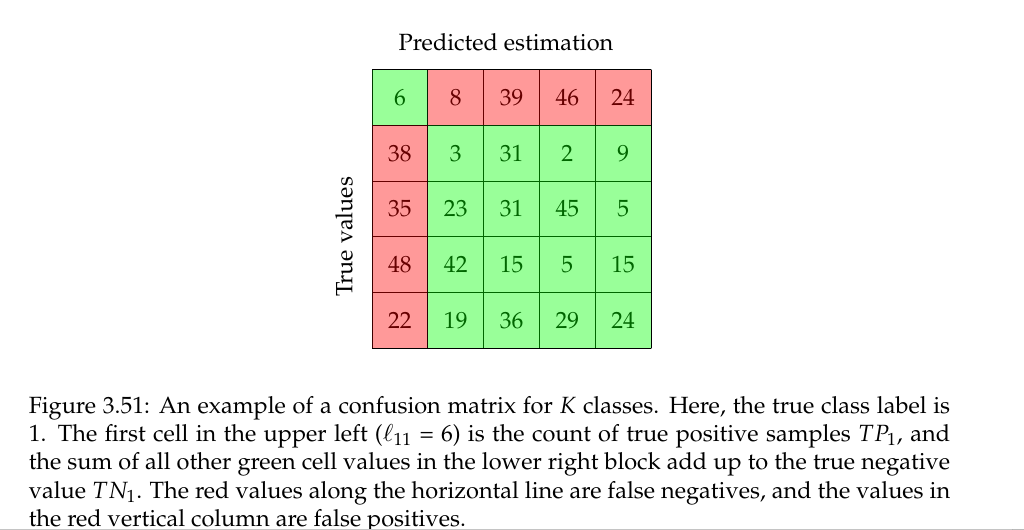

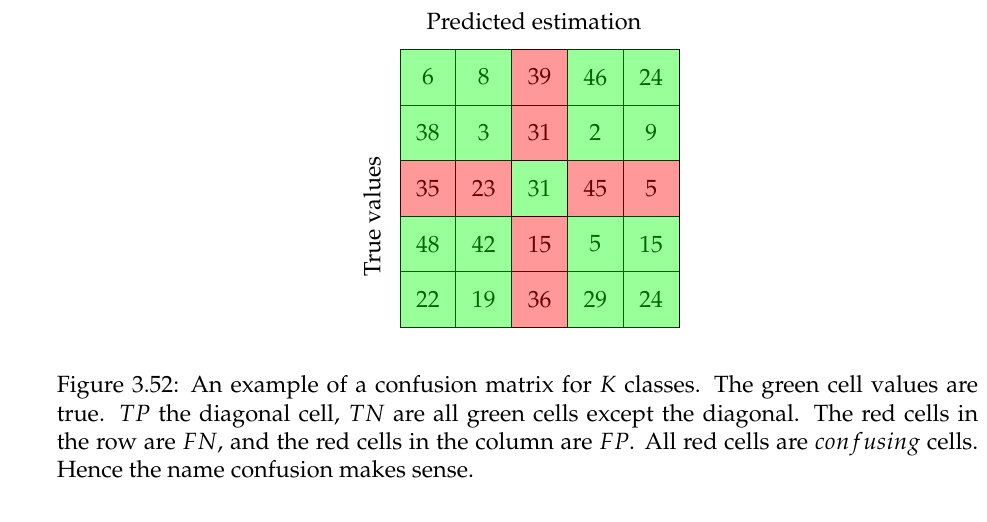

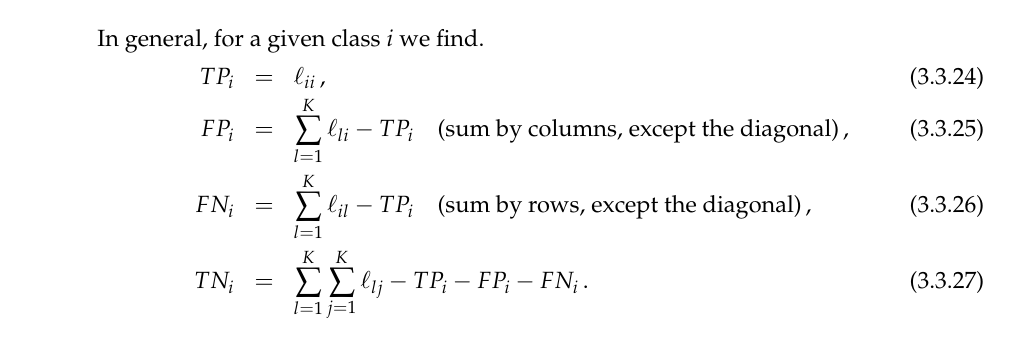

## GoogLenet



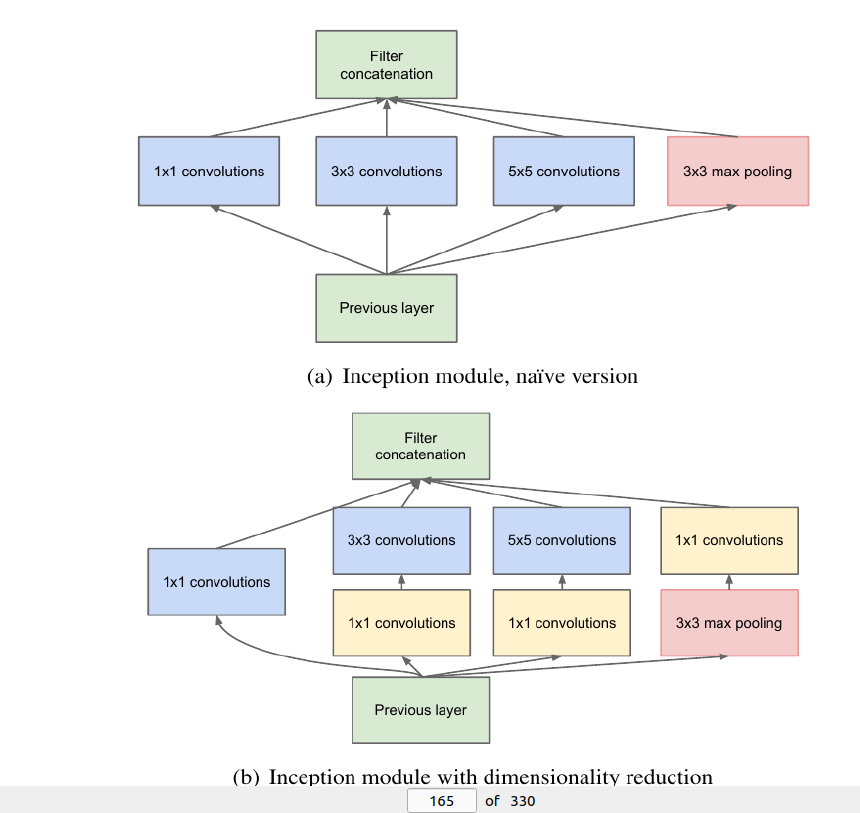

## Convoluciones $1x1$
* Es como un "average pooling" a lo largo de los canales
Asumamos una capa de dimensiones $width \times height \times depth$ en la convolucion $1 \times 1$ el $depth$ se colapsa.

Asuma los coeficientes del filtro $f_{ijk}$.  A lo largo de la $i$ de la $j$ no hay sumas (por que es $1x1$, la coloca extrae el numero), pero a lo largo de la profundidad hay una suma


$$\text{out}_{ij} = \sum_{\ell=1}^k f_{ij\ell} \text{in}_{ijl} $$
donde $i=1,2, \cdots, width$, $j=1,2, \cdots, height$.

Se colapsa la dimension en la profundidad. Note que podemos disenhar varios filtros, que van a aumentar el tamanho de salida.

En este caso tenemos una extension de la formula de arriba.

$$\text{out}_{ij}^p = \sum_{\ell=1}^k f_{ij\ell}^p \text{in}_{ijl} $$
donde
$$i=1,2, \cdots, width, \quad , \quad j=1,2, \cdots, height, \quad , \quad p = 1,2, \cdots, n_f $$

* La convolucion $1 \times 1$ puede reducir significativamente el numero de parametros.
=
$$\# \text{parametros} = (1 \times 1 \times depth + 1) \times nf $$


* Un ejemplo. Asuma el conjunto de las Flowers 17. Cada imagen tiene dimensiones $224 \times 224 \times 3$. Asumamos un kernel $5 \times 5$ convolucion padding "same". El numero de multiplicaciones total es de: (asumamos 256 filtros)

$$ 5 \times 5 \times 224 \times 224 \times 3 \times 256  =963379200
Este es el caso de la arquitectura "naive"
Para el caso de la arquitectura "normal" tenemos los
siguientes calculos.

$$ 1 \times 1 \times 224 \times 224 \times 3 \times 1 + 5 \times 5 \times 224 \times 224 \times 1 \times 256  = 321276928 $$

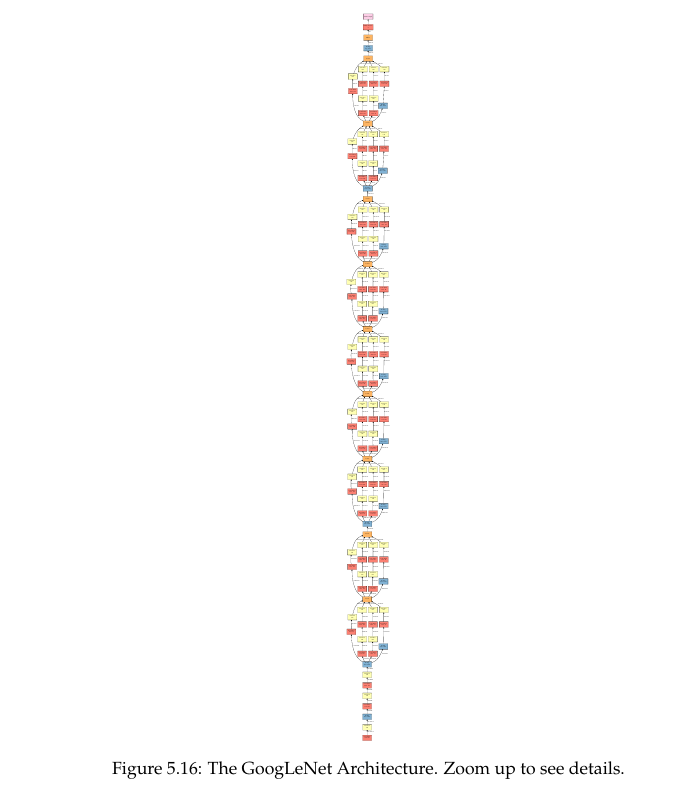

El codigo que escribo abajo es una copia con modificaciones minimas de J Brownlee.
[Machine Learning Mastery](https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/).



In [ ]:
# inception simple (naive)
def inception_module( layer_in, f1, f2, f3):

    # convolution 1 x 1
    conv1_1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)

    # convolution 3 x 3
    conv3_3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)

    # convolution 5 x 5
    conv5_5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)

    # max_pooling
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)

    # concatenacion
    layer_out = concatenate([conv1_1, conv3_3, conv5_5, pool], axis=1)

    return layer_out

In [5]:
# function to create a inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
    # primer nivel
    # 1x1 convolution
    conv11 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)

    # 1 x1 convolution
    conv12 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)

    # 1 x 1 convolution
    conv13 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)

    # maxpooling
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)

    # segundo nivel
    # 3x3 convolution
    conv21 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv11)

    # convolution 5 x 5
    conv22 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv12)

    # 1x1 conv
    conv23 = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)

    # concatenacion
    layer_out = concatenate([conv11, conv21, conv22, conv23], axis=-1)

    return layer_out



Hay muchas implementaciones en la internet del GoogLeNet, incluso ChatGPT le pueda generar un codigo.

[este sitio GitHub](https://gist.github.com/joelouismarino/a2ede9ab3928f999575423b9887abd14)
presenta una implementacion del Inception V1.

# ResNet: Residual Net

* Tambien es ganadora de ImageNet (ILSVRC). 2015
* de Microsoft.
* Autor He et. al. 2015
[20] Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun. Deep residual learning
for image recognition. https://arxiv.org/abs/1512.03385, 2015.

* De donde viene el nombre residual y para que ?
El problema hasta este punto es que las redes eran cada vez mas profundas. Esto genero el problema del "vanishing gradient" (el gradiente desvanece y el sistema para de aprender)

$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla J(\theta^{(i)}) $$
Si $ \| \nabla J(\theta^{(i)} \| \approx 0 $ entonces
$$ \theta^{(i+1)} \approx \theta^{(i)}$$

### De donde viene el nombre "residual" y por que "le saca el cuerpo" al "vanishing gradient"

Del articulo, asumimos que $\mathcal{H}(x)$ es la una capa en el la pila del la red. La entrada es $x$ y la salida, despues de $\mathcal{H}$ es $\mathcal{F}$. Entonces

$$\mathcal{F} = \mathcal{H} - x $$

* $\mathcal{F}$ es el residual
* $x$ es la capa de entrada
* $\mathcal{H}$ la capa de salida.





Las dos figuras explican la arquitectura.

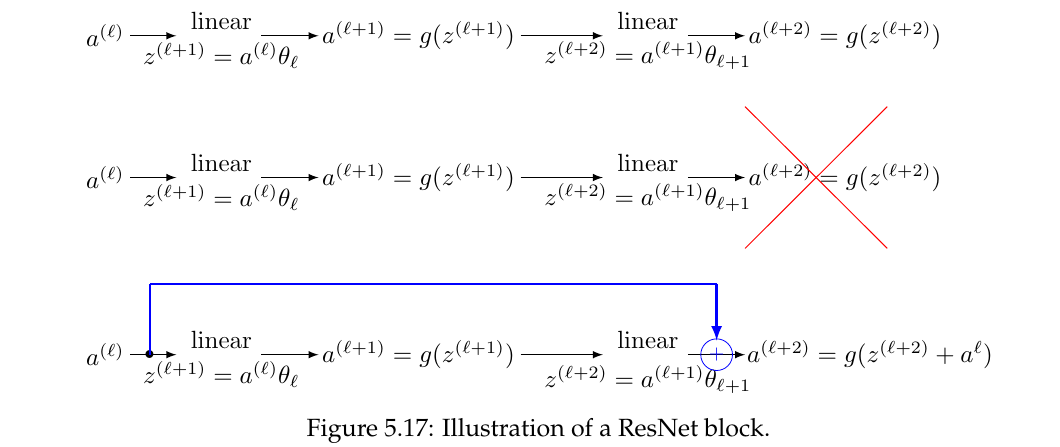

La siguiente grafica es del articulo original.


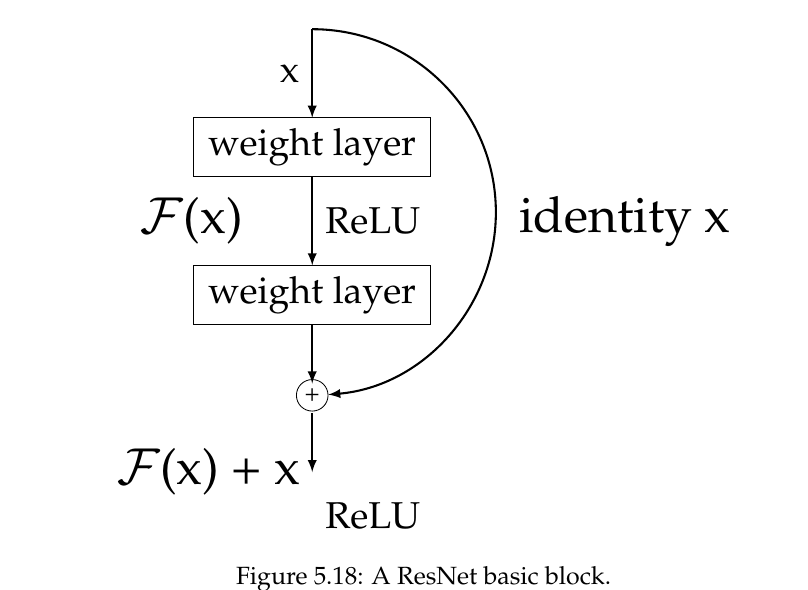

# Proxima clase:
* pseudo-Codigo para esto
* la RNN (recurrent neural network, utiles NLP)
* la LSTM (Long Short Term Memory, util NLP)
